In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
data=pd.read_excel(r"C:\Users\Asus\OneDrive\Desktop\Project\Merged.xlsx")

In [20]:
data.head()

,Unnamed: 0,Unnamed: 1,"WHEAT(CHAPATI,ROTI,NAAN,DALIA,RAWA/SOOJI,SEVIYAAN",WHEAT FREE CEREALS,FRUITS,OTHER VEGETABLES,"STARCHY(POTATO,SWEET PATATO,ARBI ETC)",PULSES AND LEGUMES,PREDOMINANT SATURATED FATS,PREDOMINANT UNSATURATED FATS,...,FOOD SUPPLEMENTS,ERGOGENIC SUPPLEMENTS,NUMBER OF RELAPSES IN LAST ONE YEAR,AGE,AGE AT DIAGNOSIS,Height in m,WEIGHT,BMI,SOCIO-ECONOMIC STATUS(KUPPUSWAMY SCORE),Label
0,NaN,NaN,4,3,7,11,3,6,0,4,...,0,0,1,56.0,54.0,1.70,65.0,22.491349,17.0,1
1,NaN,NaN,4,9,10,13,3,5,4,4,...,0,0,1,62.0,60.0,1.55,59.0,24.557752,16.0,1
2,NaN,NaN,4,2,5,15,2,6,4,0,...,0,0,0,45.0,45.0,1.82,134.0,40.454051,21.0,1
3,NaN,NaN,4,2,5,10,4,8,0,0,...,0,0,2,24.0,23.0,1.70,60.0,20.761246,18.0,1
4,NaN,NaN,4,3,6,12,4,4,4,8,...,4,0,1,30.0,24.0,1.79,60.0,18.726007,14.0,1


In [22]:
data.shape

(1129, 32)

In [24]:
data.drop(columns=['Unnamed: 0','Unnamed: 1'],axis=0,inplace=True)

In [26]:
data.shape

(1129, 30)

In [28]:
ibd=data[data['Label']==1]

In [30]:
ibd.head()

,"WHEAT(CHAPATI,ROTI,NAAN,DALIA,RAWA/SOOJI,SEVIYAAN",WHEAT FREE CEREALS,FRUITS,OTHER VEGETABLES,"STARCHY(POTATO,SWEET PATATO,ARBI ETC)",PULSES AND LEGUMES,PREDOMINANT SATURATED FATS,PREDOMINANT UNSATURATED FATS,TRANS FATS,NUTS AND OILSEEDS,...,FOOD SUPPLEMENTS,ERGOGENIC SUPPLEMENTS,NUMBER OF RELAPSES IN LAST ONE YEAR,AGE,AGE AT DIAGNOSIS,Height in m,WEIGHT,BMI,SOCIO-ECONOMIC STATUS(KUPPUSWAMY SCORE),Label
0,4,3,7,11,3,6,0,4,0,1,...,0,0,1,56.0,54.0,1.70,65.0,22.491349,17.0,1
1,4,9,10,13,3,5,4,4,0,2,...,0,0,1,62.0,60.0,1.55,59.0,24.557752,16.0,1
2,4,2,5,15,2,6,4,0,0,1,...,0,0,0,45.0,45.0,1.82,134.0,40.454051,21.0,1
3,4,2,5,10,4,8,0,0,0,1,...,0,0,2,24.0,23.0,1.70,60.0,20.761246,18.0,1
4,4,3,6,12,4,4,4,8,1,4,...,4,0,1,30.0,24.0,1.79,60.0,18.726007,14.0,1


In [32]:
ibd.shape

(302, 30)

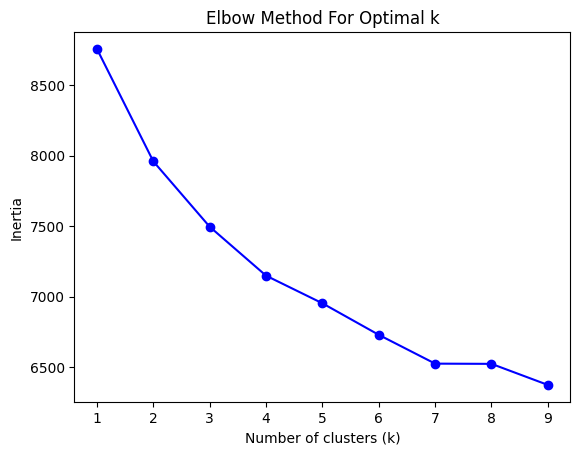

In [36]:
# Preprocessing (optional but recommended)
scaler = StandardScaler()
ibd_scaled = scaler.fit_transform(ibd)

# Step 4: Choose number of clusters (k) — Elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ibd_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

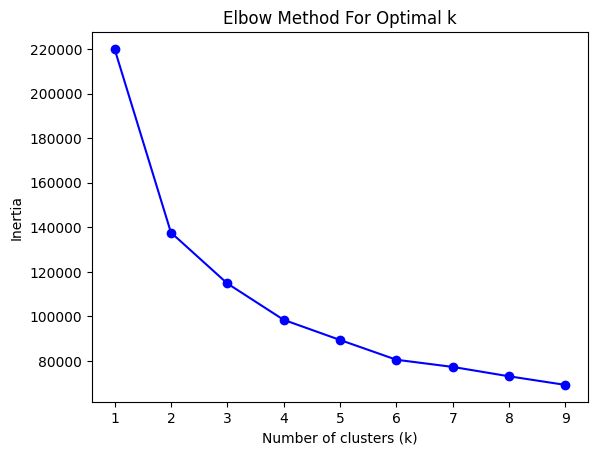

In [38]:
# Step 4: Choose number of clusters (k) — Elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ibd)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

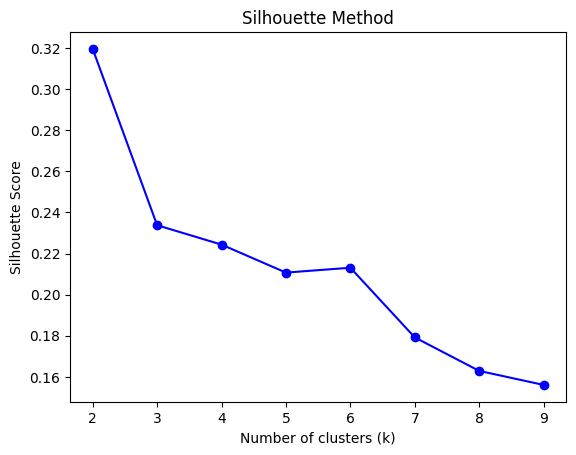

In [40]:
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(ibd)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(ibd, labels))

plt.plot(K, sil_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [42]:
# Step 5: Fit KMeans with chosen k
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(ibd)

# Step 6: Get cluster labels and add to dataframe
ibd['Cluster'] = kmeans.labels_


C:\Users\Asus\AppData\Local\Temp\ipykernel_15060\1588427347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibd['Cluster'] = kmeans.labels_


In [44]:
ibd['Cluster'].value_counts()

Cluster
1    184
0    118
Name: count, dtype: int64

In [46]:
ibd.groupby('Cluster').agg(['mean','std'])

WHEAT(CHAPATI,ROTI,NAAN,DALIA,RAWA/SOOJI,SEVIYAAN            \
                                                     mean       std   
Cluster                                                               
0                                                3.923729  0.474239   
1                                                3.902174  0.564134   

        WHEAT FREE CEREALS              FRUITS           OTHER VEGETABLES  \
                      mean       std      mean       std             mean   
Cluster                                                                     
0                 4.415254  2.546411  7.652542  3.612365        13.305085   
1                 4.358696  2.688090  7.755435  3.419643        12.353261   

                  STARCHY(POTATO,SWEET PATATO,ARBI ETC)            ...  \
              std                                  mean       std  ...   
Cluster                                                            ...   
0        2.681078                              3.186441  0.815964  ...   
1        3.015477                              3.266304  0.760899  ...   

        Height in m               WEIGHT                   BMI            \
               mean       std       mean        std       mean       std   
Cluster                                                                    
0          1.686864  0.075693  68.883051  13.979456  24.155463  4.315573   
1          1.658370  0.073437  54.472283  11.073260  19.742129  3.559110   

        SOCIO-ECONOMIC STATUS(KUPPUSWAMY SCORE)           Label       
                                           mean       std  mean  std  
Cluster                                                               
0                                     15.559322  5.669746   1.0  0.0  
1                                     15.128804  5.328671   1.0  0.0  

[2 rows x 60 columns]

In [48]:
from sklearn.metrics import silhouette_score

# Step 7: Calculate Silhouette Score
score = silhouette_score(ibd.drop('Cluster', axis=1), ibd['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.320


In [52]:
# Compute grouped statistics
cluster_stats = ibd.groupby('Cluster').agg(['mean', 'std'])

# Save to Excel
cluster_stats.to_excel("ibd_cluster_stats1.xlsx")

print("Cluster statistics saved to ibd_cluster_stats.xlsx")


Cluster statistics saved to ibd_cluster_stats.xlsx


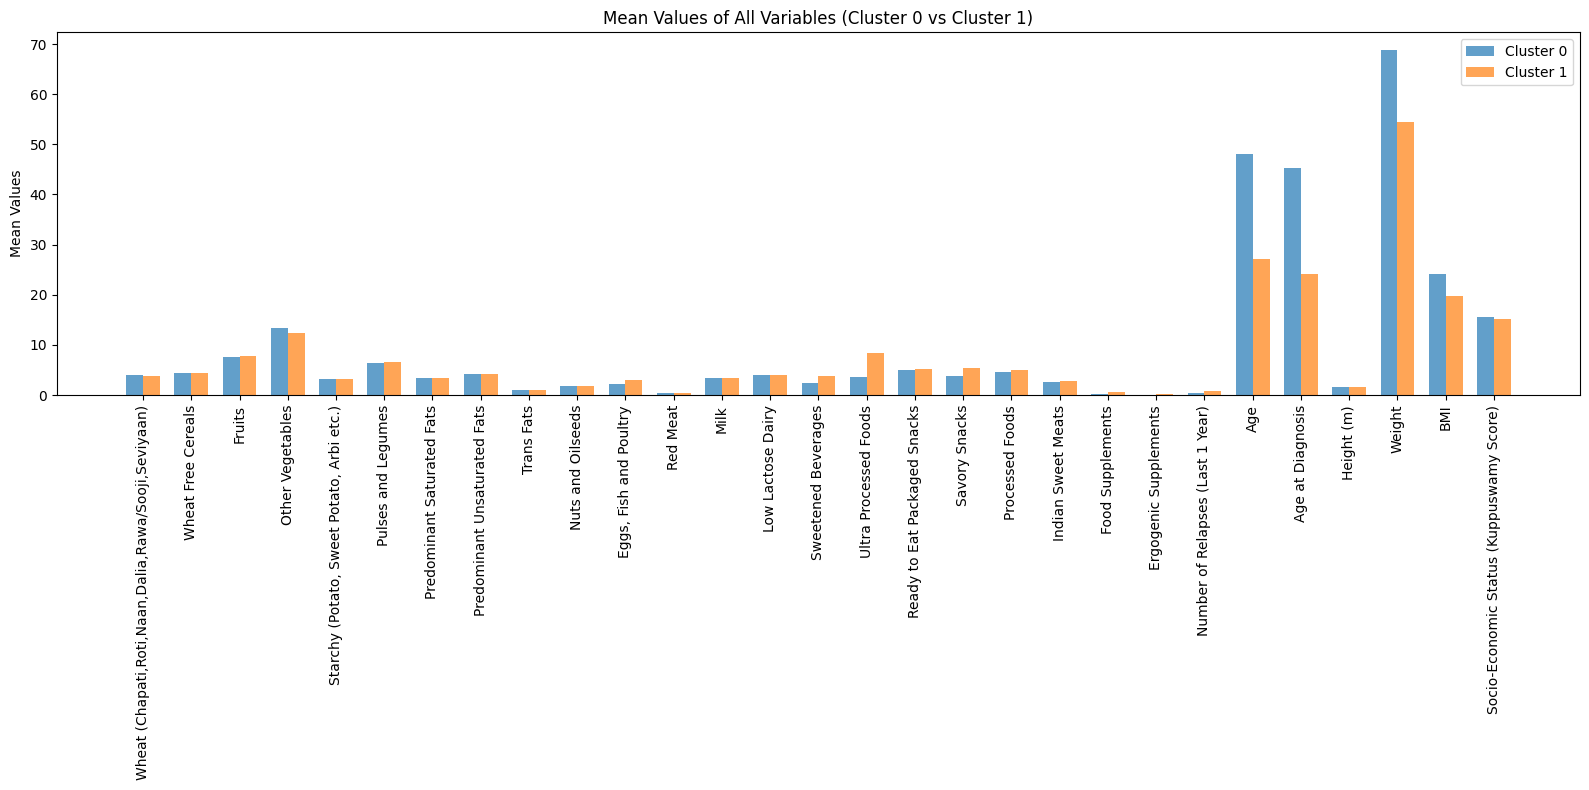

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Prepare Data
# ----------------------------
data = {
    "Category": [
        "Wheat (Chapati,Roti,Naan,Dalia,Rawa/Sooji,Seviyaan)",
        "Wheat Free Cereals",
        "Fruits",
        "Other Vegetables",
        "Starchy (Potato, Sweet Potato, Arbi etc.)",
        "Pulses and Legumes",
        "Predominant Saturated Fats",
        "Predominant Unsaturated Fats",
        "Trans Fats",
        "Nuts and Oilseeds",
        "Eggs, Fish and Poultry",
        "Red Meat",
        "Milk",
        "Low Lactose Dairy",
        "Sweetened Beverages",
        "Ultra Processed Foods",
        "Ready to Eat Packaged Snacks",
        "Savory Snacks",
        "Processed Foods",
        "Indian Sweet Meats",
        "Food Supplements",
        "Ergogenic Supplements",
        "Number of Relapses (Last 1 Year)",
        "Age",
        "Age at Diagnosis",
        "Height (m)",
        "Weight",
        "BMI",
        "Socio-Economic Status (Kuppuswamy Score)"
    ],
    "Cluster 0": [
        3.9237, 4.4153, 7.6525, 13.3051, 3.1864, 6.5, 3.4831, 4.1186, 1.1017, 1.7881,
        2.2288, 0.4661, 3.4915, 3.9576, 2.3559, 3.5424, 5.0254, 3.8220, 4.6186, 2.5508,
        0.1695, 0.0085, 0.5085, 48.0763, 45.3644, 1.6869, 68.8831, 24.1555, 15.5593
    ],
    "Cluster 1": [
        3.9022, 4.3587, 7.7554, 12.3533, 3.2663, 6.6141, 3.4783, 4.1522, 0.9728, 1.8207,
        2.9674, 0.5272, 3.4565, 3.9837, 3.8478, 8.4783, 5.1522, 5.3207, 4.9674, 2.8098,
        0.6413, 0.1848, 0.7663, 27.1576, 24.1522, 1.6584, 54.4723, 19.7421, 15.1288
    ]
}


df = pd.DataFrame(data)

# ----------------------------
# Step 2: Plot grouped bar chart
# ----------------------------
plt.figure(figsize=(16, 8))
bar_width = 0.35
x = range(len(df["Category"]))

# Plot bars for both clusters
plt.bar(x, df["Cluster 0"], width=bar_width, label="Cluster 0", alpha=0.7)
plt.bar([i + bar_width for i in x], df["Cluster 1"], width=bar_width, label="Cluster 1", alpha=0.7)

# Formatting
plt.xticks([i + bar_width/2 for i in x], df["Category"], rotation=90)
plt.ylabel("Mean Values")
plt.title("Mean Values of All Variables (Cluster 0 vs Cluster 1)")
plt.legend()
plt.tight_layout()
plt.show()


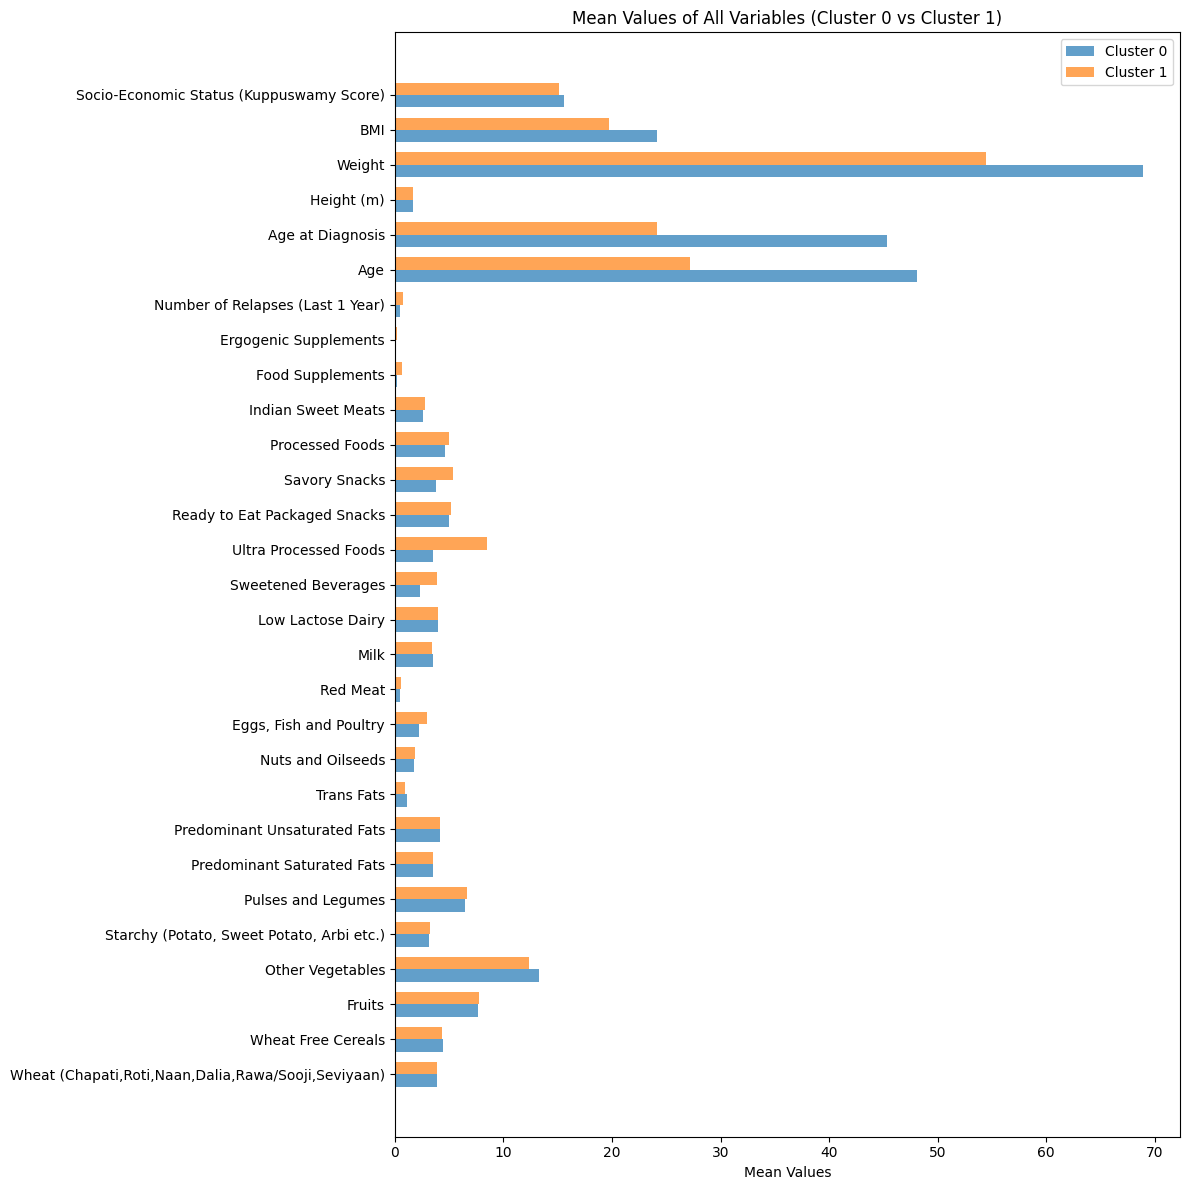

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Prepare Data
# ----------------------------
data = {
    "Category": [
        "Wheat (Chapati,Roti,Naan,Dalia,Rawa/Sooji,Seviyaan)",
        "Wheat Free Cereals",
        "Fruits",
        "Other Vegetables",
        "Starchy (Potato, Sweet Potato, Arbi etc.)",
        "Pulses and Legumes",
        "Predominant Saturated Fats",
        "Predominant Unsaturated Fats",
        "Trans Fats",
        "Nuts and Oilseeds",
        "Eggs, Fish and Poultry",
        "Red Meat",
        "Milk",
        "Low Lactose Dairy",
        "Sweetened Beverages",
        "Ultra Processed Foods",
        "Ready to Eat Packaged Snacks",
        "Savory Snacks",
        "Processed Foods",
        "Indian Sweet Meats",
        "Food Supplements",
        "Ergogenic Supplements",
        "Number of Relapses (Last 1 Year)",
        "Age",
        "Age at Diagnosis",
        "Height (m)",
        "Weight",
        "BMI",
        "Socio-Economic Status (Kuppuswamy Score)"
    ],
    "Cluster 0": [
        3.9237, 4.4153, 7.6525, 13.3051, 3.1864, 6.5, 3.4831, 4.1186, 1.1017, 1.7881,
        2.2288, 0.4661, 3.4915, 3.9576, 2.3559, 3.5424, 5.0254, 3.8220, 4.6186, 2.5508,
        0.1695, 0.0085, 0.5085, 48.0763, 45.3644, 1.6869, 68.8831, 24.1555, 15.5593
    ],
    "Cluster 1": [
        3.9022, 4.3587, 7.7554, 12.3533, 3.2663, 6.6141, 3.4783, 4.1522, 0.9728, 1.8207,
        2.9674, 0.5272, 3.4565, 3.9837, 3.8478, 8.4783, 5.1522, 5.3207, 4.9674, 2.8098,
        0.6413, 0.1848, 0.7663, 27.1576, 24.1522, 1.6584, 54.4723, 19.7421, 15.1288
    ]
}

df = pd.DataFrame(data)

# ----------------------------
# Step 2: Plot grouped horizontal bar chart
# ----------------------------
plt.figure(figsize=(12, 12))
bar_height = 0.35
y = range(len(df["Category"]))

# Plot horizontal bars for both clusters
plt.barh(y, df["Cluster 0"], height=bar_height, label="Cluster 0", alpha=0.7)
plt.barh([i + bar_height for i in y], df["Cluster 1"], height=bar_height, label="Cluster 1", alpha=0.7)

# Formatting
plt.yticks([i + bar_height/2 for i in y], df["Category"])
plt.xlabel("Mean Values")
plt.title("Mean Values of All Variables (Cluster 0 vs Cluster 1)")
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
IBD_UC = np.array([3, 4, 0, 3, 249, 0])
IBD_CD = np.array([0, 0, 0, 0, 43, 0])
CONTROLS = np.array([0, 0, 0, 1, 826, 0])
IBD_TOTAL = np.array([3, 4, 0, 3, 292, 0])

categories = np.array([0, 1, 2, 3, 4, 5])  # e.g., consumption levels

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 120889.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 103087.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 17802.0
 p-value : 0.82375

IBD_UC vs IBD_CD
 U statistic: 5353.5
 p-value : 0.19191

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.03190339293865163
 p-value : 0.97129

IBD_UC vs CONTROLS
 KS statistic: 0.03740084876723329
 p-value : 0.93341

IBD_CD vs CONTROLS
 KS statistic: 0.0012091898428053204
 p-value : 1.00000

IBD_UC vs IBD_CD
 KS statistic: 0.03861003861003861
 p-value : 1.00000

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.83080 bits
KL(IBD_UC || CONTROLS) = 0.97716 bits
KL(IBD_CD || CONTROLS) = 0.00175 bits
KL(IBD_UC || IBD_CD) = 1.19557 bits


In [3]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
# Categories (consumption levels)
categories = np.arange(0, 21)  # 0 to 20

# Counts for each group
IBD_UC = np.array([5, 19, 39, 41, 50, 38, 32, 16, 6, 3, 2, 3, 1, 0, 0, 0, 3, 0, 0, 0, 1])
IBD_CD = np.array([0, 1, 6, 8, 7, 8, 3, 6, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
IBD_TOTAL = np.array([5, 20, 45, 49, 57, 46, 35, 22, 8, 4, 3, 3, 1, 0, 0, 0, 3, 0, 0, 0, 1])
CONTROLS = np.array([0, 1, 3, 20, 120, 459, 178, 36, 7, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 83535.0
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 69669.0
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 13866.0
 p-value : 0.00760

IBD_UC vs IBD_CD
 U statistic: 4907.0
 p-value : 0.20796

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.40865811958967624
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.42047125723062845
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.337504569612778
 p-value : 0.00012

IBD_UC vs IBD_CD
 KS statistic: 0.09742300439974859
 p-value : 0.83875

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 3.03354 bits
KL(IBD_UC || CONTROLS) = 3.31662 bits
KL(IBD_CD || CONTROLS) = 1.52576 bits
KL(IBD_UC || IBD_CD) = 1.69938 bits


In [90]:
#Fruits

In [9]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
# Categories (consumption levels)
categories = np.arange(0, 17)  # 0 to 16

# Counts for each group
IBD_UC = np.array([8, 1, 4, 14, 34, 19, 27, 25, 21, 24, 22, 19, 21, 11, 3, 3, 3])
IBD_CD = np.array([0, 0, 0, 2, 6, 2, 3, 2, 4, 5, 4, 7, 4, 2, 2, 0, 0])
IBD_TOTAL = np.array([8, 1, 4, 16, 40, 21, 30, 27, 25, 29, 26, 26, 25, 13, 5, 3, 3])
CONTROLS = np.array([0, 0, 2, 1, 65, 64, 124, 145, 285, 76, 30, 16, 16, 4, 1, 0, 0])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 134093.5
 p-value : 0.06270

IBD_UC vs CONTROLS
 U statistic: 111361.5
 p-value : 0.35665

IBD_CD vs CONTROLS
 U statistic: 22732.0
 p-value : 0.00180

IBD_UC vs IBD_CD
 U statistic: 4660.0
 p-value : 0.08560

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.2579665918404844
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.2367694249479533
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.385642550565265
 p-value : 0.00001

IBD_UC vs IBD_CD
 KS statistic: 0.16081530035018407
 p-value : 0.26256

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 2.60152 bits
KL(IBD_UC || CONTROLS) = 2.86079 bits
KL(IBD_CD || CONTROLS) = 1.26158 bits
KL(IBD_UC || IBD_CD) = 2.43083 bits


In [98]:
#vegetables

In [100]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(1, 21)  # 1 to 20

# Counts for each group
IBD_UC = np.array([0, 0, 2, 2, 4, 5, 6, 3, 15, 9, 26, 27, 48, 44, 31, 26, 5, 2, 3, 1])
IBD_CD= np.array([0, 0, 0, 0, 0, 1, 0, 0, 1, 6, 3, 9, 7, 3, 6, 2, 4, 0, 0, 1])
IBD_TOTAL = np.array([0, 0, 2, 2, 4, 6, 6, 3, 16, 15, 29, 36, 55, 47, 37, 28, 9, 2, 3, 2])
CONTROLS = np.array([0, 0, 0, 0, 0, 0, 0, 3, 14, 34, 93, 258, 167, 168, 60, 28, 1, 1, 0, 0])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 135028.0
 p-value : 0.03318

IBD_UC vs CONTROLS
 U statistic: 116354.0
 p-value : 0.03237

IBD_CD vs CONTROLS
 U statistic: 18674.0
 p-value : 0.56922

IBD_UC vs IBD_CD
 U statistic: 5564.0
 p-value : 0.99393

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.15938483467732248
 p-value : 0.00002

IBD_UC vs CONTROLS
 KS statistic: 0.1537211766957837
 p-value : 0.00015

IBD_CD vs CONTROLS
 KS statistic: 0.19349849554287
 p-value : 0.08116

IBD_UC vs IBD_CD
 KS statistic: 0.09634551495016612
 p-value : 0.84378

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 3.25735 bits
KL(IBD_UC || CONTROLS) = 3.47546 bits
KL(IBD_CD || CONTROLS) = 2.40918 bits
KL(IBD_UC || IBD_CD) = 2.98547 bits


In [ ]:
#starchy

In [102]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
# Categories (consumption levels)
categories = np.arange(0, 5)  # 0 to 4

# Counts for each group
IBD_UC= np.array([1, 7, 34, 115, 102])
IBD_CD = np.array([0, 0, 4, 15, 1])
IBD_TOTAL= np.array([1, 7, 38, 130, 103])
CONTROLS = np.array([2, 39, 501, 279, 6])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 184695.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 172483.0
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 12212.5
 p-value : 0.00002

IBD_UC vs IBD_CD
 U statistic: 3379.5
 p-value : 0.01361

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.4905063428291575
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.4932187326383215
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.45538089480048366
 p-value : 0.00032

IBD_UC vs IBD_CD
 KS statistic: 0.3438223938223938
 p-value : 0.01868

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 1.99592 bits
KL(IBD_UC || CONTROLS) = 2.13660 bits
KL(IBD_CD || CONTROLS) = 0.68391 bits
KL(IBD_UC || IBD_CD) = 1.74491 bits


In [ ]:
#pulses and Legumes

In [104]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(0, 11)  # 0 to 4

# Counts for each group
IBD_UC= np.array([0,0,3,6,18,40,60,54,53,24,1])
IBD_CD = np.array([0,0,0,0,3,6,4,13,10,7,0])
IBD_TOTAL= np.array([0,0,3,6,21,46,64,67,63,31,1])
CONTROLS = np.array([0,0,3,22,41,104,290,205,121,40,1])


# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 135838.5
 p-value : 0.02027

IBD_UC vs CONTROLS
 U statistic: 113524.5
 p-value : 0.13357

IBD_CD vs CONTROLS
 U statistic: 22314.0
 p-value : 0.00361

IBD_UC vs IBD_CD
 U statistic: 4614.0
 p-value : 0.06712

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.11868078188937915
 p-value : 0.00354

IBD_UC vs CONTROLS
 KS statistic: 0.10526954662383925
 p-value : 0.02314

IBD_CD vs CONTROLS
 KS statistic: 0.25390174629509854
 p-value : 0.00823

IBD_UC vs IBD_CD
 KS statistic: 0.18802190895214152
 p-value : 0.12690

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.11564 bits
KL(IBD_UC || CONTROLS) = 0.09624 bits
KL(IBD_CD || CONTROLS) = 0.40434 bits
KL(IBD_UC || IBD_CD) = 1.36312 bits


In [ ]:
#saturated Fats

In [106]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(0, 9)  # 0 to 4

# Counts for each group
IBD_UC= np.array([15,13,16,22,185,3,1,3,1])
IBD_CD = np.array([1,2,4,6,28,2,0,0,0])
IBD_TOTAL= np.array([16,15,20,28,213,5,1,3,1])
CONTROLS = np.array([15,382,316,44,70,0,0,0,0])


# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 211856.0
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 180976.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 30879.5
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 5669.5
 p-value : 0.81385

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.693278185734763
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.6922681880360236
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.6993616602457748
 p-value : 0.00000

IBD_UC vs IBD_CD
 KS statistic: 0.04749932656909401
 p-value : 0.99997

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 3.18860 bits
KL(IBD_UC || CONTROLS) = 3.14363 bits
KL(IBD_CD || CONTROLS) = 3.56550 bits
KL(IBD_UC || IBD_CD) = 0.66621 bits


In [ ]:
#unsaturated fats

In [108]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(0, 9)  # 0 to 4

# Counts for each group
IBD_UC= np.array([14,5,15,23,135,32,13,12,10])
IBD_CD = np.array([0,0,2,4,19,8,3,2,5])
IBD_TOTAL= np.array([14,5,17,27,154,40,16,14,15])
CONTROLS = np.array([1,55,34,9,485,186,27,18,12])


# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 119748.0
 p-value : 0.24008

IBD_UC vs CONTROLS
 U statistic: 99252.0
 p-value : 0.04723

IBD_CD vs CONTROLS
 U statistic: 20496.0
 p-value : 0.05791

IBD_UC vs IBD_CD
 U statistic: 4425.0
 p-value : 0.02038

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.08889947708545208
 p-value : 0.05628

IBD_UC vs CONTROLS
 KS statistic: 0.10036742563949336
 p-value : 0.03460

IBD_CD vs CONTROLS
 KS statistic: 0.16363431849498045
 p-value : 0.19951

IBD_UC vs IBD_CD
 KS statistic: 0.15991739247553202
 p-value : 0.27157

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.47952 bits
KL(IBD_UC || CONTROLS) = 0.50019 bits
KL(IBD_CD || CONTROLS) = 0.54136 bits
KL(IBD_UC || IBD_CD) = 2.47565 bits


In [ ]:
#trans fats

In [110]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(0, 5)  # 0 to 4

# Counts for each group
IBD_UC= np.array([147,35,24,32,21])
IBD_CD = np.array([23,8,2,6,4])
IBD_TOTAL= np.array([170,43,26,38,25])
CONTROLS = np.array([68,607,76,7,69])


# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 88776.0
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 75899.0
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 12877.0
 p-value : 0.00014

IBD_UC vs IBD_CD
 U statistic: 5416.5
 p-value : 0.75173

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.48068899797400644
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.4853426582568058
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.45265881161947075
 p-value : 0.00000

IBD_UC vs IBD_CD
 KS statistic: 0.03268384663733501
 p-value : 1.00000

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 1.70628 bits
KL(IBD_UC || CONTROLS) = 1.72759 bits
KL(IBD_CD || CONTROLS) = 1.60970 bits
KL(IBD_UC || IBD_CD) = 0.04062 bits


In [ ]:
#nuts and oil seeds

In [112]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(0, 5)  # 0 to 4

# Counts for each group
IBD_UC= np.array([42,77,58,59,23])
IBD_CD = np.array([5,16,6,8,8])
IBD_TOTAL= np.array([47,93,64,67,31])
CONTROLS = np.array([5,747,41,7,27])


# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 163342.0
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 139758.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 23583.5
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 5224.0
 p-value : 0.50469

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.44573460284920363
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.44985130233014153
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.42093866876634517
 p-value : 0.00000

IBD_UC vs IBD_CD
 KS statistic: 0.09724342282481817
 p-value : 0.84031

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 1.91038 bits
KL(IBD_UC || CONTROLS) = 1.99031 bits
KL(IBD_CD || CONTROLS) = 1.52471 bits
KL(IBD_UC || IBD_CD) = 0.10618 bits


In [ ]:
#eggs 

In [116]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(0, 13)  # 0 to 4

# Counts for each group

IBD_UC =np.array([121, 11, 19, 14, 23, 21, 11, 5, 8, 5, 7, 1, 3])
IBD_CD =np.array ([17, 1, 4, 6, 3, 1, 3, 4, 2, 2, 0, 0, 0])
IBD_TOTAL=np.array([138,12,23,20,26,22,14,9,10,7,7,1,3])
CONTROLS = np.array([531, 31, 178, 53, 19, 7, 4, 0, 1, 3, 0, 0, 0])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 154317.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 129778.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 24539.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 4847.5
 p-value : 0.29526

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.3023347302512796
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.29623694293498054
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.3831725766991929
 p-value : 0.00001

IBD_UC vs IBD_CD
 KS statistic: 0.11151583076492015
 p-value : 0.70443

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 3.04912 bits
KL(IBD_UC || CONTROLS) = 2.88857 bits
KL(IBD_CD || CONTROLS) = 4.25488 bits
KL(IBD_UC || IBD_CD) = 1.62273 bits


In [ ]:
#red meat

In [118]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(0, 5)  # 0 to 4

# Counts for each group
IBD_UC= np.array([185,37,25,9,3])
IBD_CD = np.array([26,11,3,3,0])
IBD_TOTAL= np.array([211,48,28,12,3])
CONTROLS = np.array([746,74,4,2,1])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 151682.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 128430.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 23252.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 5035.5
 p-value : 0.21437

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.20338012604402733
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.18776990844705477
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.2974044599420714
 p-value : 0.00106

IBD_UC vs IBD_CD
 KS statistic: 0.10963455149501661
 p-value : 0.72230

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.45989 bits
KL(IBD_UC || CONTROLS) = 0.44414 bits
KL(IBD_CD || CONTROLS) = 0.64576 bits
KL(IBD_UC || IBD_CD) = 0.43503 bits


In [ ]:
#milk

In [120]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================

categories = np.arange(0, 5)  # 0 to 4

# Counts for each group
IBD_UC= np.array([9,8,23,13,206])
IBD_CD = np.array([5,3,5,2,28])
IBD_TOTAL= np.array([14,11,28,15,234])
CONTROLS = np.array([35,16,26,15,735])
# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 111300.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 97729.0
 p-value : 0.00032

IBD_CD vs CONTROLS
 U statistic: 13571.5
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 6472.0
 p-value : 0.01976

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.1139200973758178
 p-value : 0.00580

IBD_UC vs CONTROLS
 KS statistic: 0.09338773909511515
 p-value : 0.05939

IBD_CD vs CONTROLS
 KS statistic: 0.2375917437642361
 p-value : 0.01624

IBD_UC vs IBD_CD
 KS statistic: 0.1478854269551944
 p-value : 0.35921

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.10285 bits
KL(IBD_UC || CONTROLS) = 0.09031 bits
KL(IBD_CD || CONTROLS) = 0.28903 bits
KL(IBD_UC || IBD_CD) = 0.10366 bits


In [ ]:
#low lactose

In [126]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================

# Counts for each group
categories = np.arange(13)  # 0 to 12

# Counts
IBD_UC = np.array([7, 6, 17, 13, 153, 35, 20, 7, 1, 0, 0, 0, 0])
IBD_CD = np.array([5, 0, 4, 3, 21, 7, 0, 3, 0, 0, 0, 0, 0])
IBD_TOTAL = np.array([12, 6, 21, 16, 174, 42, 20, 10, 1, 0, 0, 0, 0])
CONTROLS = np.array([2, 10, 16, 39, 23, 56, 186, 98, 39, 297, 46, 3, 12])
# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 28888.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 25043.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 3845.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 6156.5
 p-value : 0.21696

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.7208092763279067
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.7153501748423151
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.7536908410899581
 p-value : 0.00000

IBD_UC vs IBD_CD
 KS statistic: 0.11304660141869444
 p-value : 0.68862

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 2.78530 bits
KL(IBD_UC || CONTROLS) = 2.78448 bits
KL(IBD_CD || CONTROLS) = 3.07159 bits
KL(IBD_UC || IBD_CD) = 3.56172 bits


In [ ]:
#SWEETEND

In [130]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================

categories = np.arange(11)  # 0 to 10

# Counts
IBD_UC = np.array([7, 6, 17, 13, 153, 35, 20, 7, 1, 0, 0])
IBD_CD = np.array([5, 0, 4, 3, 21, 7, 0, 3, 0, 0, 0])
IBD_TOTAL = np.array([12, 6, 21, 16, 174, 42, 20, 10, 1, 0, 0])
CONTROLS= np.array([7, 63, 226, 368, 135, 22, 5, 0, 0, 0, 1])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 198653.0
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 172954.0
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 25699.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 6156.5
 p-value : 0.21696

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.6207828503247195
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.6368788895995667
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.5238322881808724
 p-value : 0.00000

IBD_UC vs IBD_CD
 KS statistic: 0.11304660141869444
 p-value : 0.68862

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 2.73193 bits
KL(IBD_UC || CONTROLS) = 2.56284 bits
KL(IBD_CD || CONTROLS) = 4.03176 bits
KL(IBD_UC || IBD_CD) = 3.56172 bits


In [ ]:
#ULTRA

In [134]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================

categories = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 34, 35, 36, 37])

# Counts
IBD_UC= np.array([19, 38, 40, 22, 22, 18, 13, 10, 7, 13, 5, 6, 2, 4, 6, 8, 3, 1, 3, 4, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1])
IBD_CD = np.array([4, 2, 6, 2, 2, 3, 4, 3, 5, 2, 1, 0, 3, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
IBD_TOTAL = np.array([23, 40, 46, 24, 24, 21, 17, 13, 12, 15, 6, 6, 5, 5, 6, 9, 4, 3, 4, 4, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1])
CONTROLS = np.array([35, 72, 115, 78, 39, 53, 73, 77, 70, 63, 50, 36, 17, 12, 13, 19, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 116123.0
 p-value : 0.07007

IBD_UC vs CONTROLS
 U statistic: 97367.0
 p-value : 0.02664

IBD_CD vs CONTROLS
 U statistic: 18756.0
 p-value : 0.54244

IBD_UC vs IBD_CD
 U statistic: 4885.0
 p-value : 0.19593

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.11540155513024816
 p-value : 0.00499

IBD_UC vs CONTROLS
 KS statistic: 0.1398971955199283
 p-value : 0.00078

IBD_CD vs CONTROLS
 KS statistic: 0.1294957959562442
 p-value : 0.45942

IBD_UC vs IBD_CD
 KS statistic: 0.17230852114573045
 p-value : 0.19658

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 2.35235 bits
KL(IBD_UC || CONTROLS) = 2.74672 bits
KL(IBD_CD || CONTROLS) = 0.52662 bits
KL(IBD_UC || IBD_CD) = 4.05077 bits


In [ ]:
#SNACKS

In [136]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(9)  # 0 to 8

# Counts
IBD_UC = np.array([10, 5, 11, 12, 32, 38, 126, 13, 12])
IBD_CD = np.array([0, 0, 5, 2, 8, 3, 23, 2, 10])
IBD_TOTAL = np.array([10, 5, 16, 14, 40, 41, 149, 15, 22])
CONTROLS = np.array([8, 10, 135, 122, 327, 184, 27, 0, 14])

# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 199823.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 165163.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 34660.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 5917.5
 p-value : 0.09321

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.546577062598828
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.5334347994565649
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.6108005749355478
 p-value : 0.00000

IBD_UC vs IBD_CD
 KS statistic: 0.14234719895097253
 p-value : 0.30053

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 3.43719 bits
KL(IBD_UC || CONTROLS) = 3.53522 bits
KL(IBD_CD || CONTROLS) = 3.24660 bits
KL(IBD_UC || IBD_CD) = 2.10213 bits


In [ ]:
#SAVORY SNACKS

In [138]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(17)  # 0 to 16

# Counts
IBD_UC = np.array([14, 27, 26, 29, 48, 19, 22, 22, 21, 14, 5, 7, 3, 0, 1, 0, 1])
IBD_CD = np.array([0, 2, 7, 9, 7, 2, 6, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0])
IBD_TOTAL = np.array([14, 29, 33, 38, 55, 21, 28, 25, 23, 16, 7, 8, 3, 0, 1, 0, 1])
CONTROLS= np.array([8, 10, 135, 122, 327, 184, 27, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0])
# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 141421.0
 p-value : 0.00046

IBD_UC vs CONTROLS
 U statistic: 121402.0
 p-value : 0.00084

IBD_CD vs CONTROLS
 U statistic: 20019.0
 p-value : 0.14769

IBD_UC vs IBD_CD
 U statistic: 5547.0
 p-value : 0.96821

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.32128414359729973
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.32107958710135254
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.3225162397007958
 p-value : 0.00028

IBD_UC vs IBD_CD
 KS statistic: 0.11178953039418156
 p-value : 0.69506

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 8.04423 bits
KL(IBD_UC || CONTROLS) = 8.18775 bits
KL(IBD_CD || CONTROLS) = 7.41966 bits
KL(IBD_UC || IBD_CD) = 2.52565 bits


In [ ]:
#PROCESSED

In [140]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

# Counts
IBD_UC = np.array([12, 19, 34, 22, 32, 28, 50, 31, 13, 6, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])
IBD_CD = np.array([3, 4, 4, 2, 7, 10, 6, 3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
IBD_TOTAL = np.array([15, 23, 38, 24, 39, 38, 56, 34, 14, 7, 2, 3, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1])
CONTROLS = np.array([2, 3, 13, 61, 120, 216, 252, 105, 41, 10, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 101937.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 89065.5
 p-value : 0.00003

IBD_CD vs CONTROLS
 U statistic: 12872.0
 p-value : 0.00173

IBD_UC vs IBD_CD
 U statistic: 5986.5
 p-value : 0.42759

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.23559983023294923
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.2403813383257156
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.23404853631787634
 p-value : 0.01872

IBD_UC vs IBD_CD
 KS statistic: 0.13010685103708358
 p-value : 0.51187

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 2.05748 bits
KL(IBD_UC || CONTROLS) = 2.02185 bits
KL(IBD_CD || CONTROLS) = 2.49206 bits
KL(IBD_UC || IBD_CD) = 1.21459 bits


In [ ]:
#INDIAN

In [142]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(7)  # 0 to 6

# Counts
IBD_UC= np.array([11, 26, 71, 74, 63, 13, 1])
IBD_CD= np.array([1, 9, 14, 9, 9, 1, 0])
IBD_TOTAL = np.array([12, 35, 85, 83, 72, 14, 1])
CONTROLS = np.array([1, 221, 527, 77, 0, 1, 0])
# ==============================
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 182408.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 159259.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 23149.0
 p-value : 0.00010

IBD_UC vs IBD_CD
 U statistic: 6422.5
 p-value : 0.09720

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.46859709954595324
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.488694775272768
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.34754365737746407
 p-value : 0.00006

IBD_UC vs IBD_CD
 KS statistic: 0.14115111789530393
 p-value : 0.41230

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 10.25385 bits
KL(IBD_UC || CONTROLS) = 10.55107 bits
KL(IBD_CD || CONTROLS) = 8.56290 bits
KL(IBD_UC || IBD_CD) = 0.21745 bits


In [ ]:
#FOOD SUPPLEMENTS

In [144]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(13)  # 0 to 12

# Counts
IBD_UC = np.array([223, 9, 4, 13, 6, 0, 1, 0, 1, 1, 0, 0, 1])
IBD_CD= np.array([34, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0])
IBD_TOTAL = np.array([257, 11, 6, 16, 8, 0, 1, 0, 1, 1, 0, 0, 1])
CONTROLS = np.array([826, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 143350.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 121866.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 21484.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 5191.5
 p-value : 0.25160

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.14779743267375098
 p-value : 0.00011

IBD_UC vs CONTROLS
 KS statistic: 0.13778694915333367
 p-value : 0.00098

IBD_CD vs CONTROLS
 KS statistic: 0.20809313573859003
 p-value : 0.04945

IBD_UC vs IBD_CD
 KS statistic: 0.07030618658525635
 p-value : 0.98623

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 4.22862 bits
KL(IBD_UC || CONTROLS) = 3.89809 bits
KL(IBD_CD || CONTROLS) = 6.28417 bits
KL(IBD_UC || IBD_CD) = 0.49252 bits


In [ ]:
#ERGOGENIC

In [146]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(5)  # 0 to 4

# Counts
IBD_UC = np.array([248, 3, 2, 3, 3])
IBD_CD= np.array([41, 0, 0, 1, 1])
IBD_TOTAL = np.array([289, 3, 2, 4, 4])
CONTROLS= np.array([823, 4, 0, 0, 0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 129668.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 111143.0
 p-value : 0.00001

IBD_CD vs CONTROLS
 U statistic: 18525.5
 p-value : 0.00123

IBD_UC vs IBD_CD
 U statistic: 5541.0
 p-value : 0.88488

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.03820959824467276
 p-value : 0.88775

IBD_UC vs CONTROLS
 KS statistic: 0.03763428309982119
 p-value : 0.93034

IBD_CD vs CONTROLS
 KS statistic: 0.046511627906976744
 p-value : 0.99995

IBD_UC vs IBD_CD
 KS statistic: 0.02334560474095358
 p-value : 1.00000

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 1.16396 bits
KL(IBD_UC || CONTROLS) = 1.08359 bits
KL(IBD_CD || CONTROLS) = 1.68463 bits
KL(IBD_UC || IBD_CD) = 0.59992 bits


unmerged

In [ ]:
#wheat

In [151]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([3,4,0,3,249,0])
IBD_CD= np.array([0,0,0,0,43,0])
IBD_TOTAL = np.array([3,4,0,3,292,0])
CONTROLS= np.array([0,0,0,1,826,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 120889.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 103087.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 17802.0
 p-value : 0.82375

IBD_UC vs IBD_CD
 U statistic: 5353.5
 p-value : 0.19191

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.03190339293865163
 p-value : 0.97129

IBD_UC vs CONTROLS
 KS statistic: 0.03740084876723329
 p-value : 0.93341

IBD_CD vs CONTROLS
 KS statistic: 0.0012091898428053204
 p-value : 1.00000

IBD_UC vs IBD_CD
 KS statistic: 0.03861003861003861
 p-value : 1.00000

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.83080 bits
KL(IBD_UC || CONTROLS) = 0.97716 bits
KL(IBD_CD || CONTROLS) = 0.00175 bits
KL(IBD_UC || IBD_CD) = 1.19557 bits


In [ ]:
#rice

In [175]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([39,113,48,32,27,0])
IBD_CD= np.array([3,16,12,7,5,0])
IBD_TOTAL = np.array([42,129,60,39,32,0])
CONTROLS= np.array([2,77,620,127,1,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 84792.0
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 70003.0
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 14789.0
 p-value : 0.01730

IBD_UC vs IBD_CD
 U statistic: 4699.0
 p-value : 0.08551

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.4706991679812936
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.4913465892909666
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.34633446753465874
 p-value : 0.00007

IBD_UC vs IBD_CD
 KS statistic: 0.14501212175630782
 p-value : 0.37972

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 2.02264 bits
KL(IBD_UC || CONTROLS) = 2.12757 bits
KL(IBD_CD || CONTROLS) = 1.46391 bits
KL(IBD_UC || IBD_CD) = 0.09228 bits


In [ ]:
#maize

In [155]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([76,116,51,12,2,2])
IBD_CD= np.array([9,20,13,1,0,0])
IBD_TOTAL = np.array([85,136,64,13,2,2])
CONTROLS= np.array([5,660,160,0,2,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 107483.5
 p-value : 0.00001

IBD_UC vs CONTROLS
 U statistic: 90251.0
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 17232.5
 p-value : 0.63476

IBD_UC vs IBD_CD
 U statistic: 5038.5
 p-value : 0.28626

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.27541100442835753
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.28739034422226684
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.20325637636736874
 p-value : 0.05851

IBD_UC vs IBD_CD
 KS statistic: 0.08413396785489809
 p-value : 0.93295

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 3.11328 bits
KL(IBD_UC || CONTROLS) = 3.34819 bits
KL(IBD_CD || CONTROLS) = 1.77441 bits
KL(IBD_UC || IBD_CD) = 0.53138 bits


In [177]:
#oats

In [179]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([231,18,5,4,1,0])
IBD_CD= np.array([34,8,1,0,0,0])
IBD_TOTAL = np.array([265,26,6,4,1,0])
CONTROLS= np.array([824,2,1,0,0,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 139724.0
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 118289.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 21434.5
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 5038.5
 p-value : 0.07926

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.11888898676297477
 p-value : 0.00346

IBD_UC vs CONTROLS
 KS statistic: 0.10448053857969215
 p-value : 0.02471

IBD_CD vs CONTROLS
 KS statistic: 0.20567475605297939
 p-value : 0.05381

IBD_UC vs IBD_CD
 KS statistic: 0.10119421747328725
 p-value : 0.80508

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.96362 bits
KL(IBD_UC || CONTROLS) = 0.97585 bits
KL(IBD_CD || CONTROLS) = 1.00112 bits
KL(IBD_UC || IBD_CD) = 0.67322 bits


In [ ]:
#barley

In [181]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([246,6,5,1,1,0])
IBD_CD= np.array([42,0,1,0,0,0])
IBD_TOTAL = np.array([288,6,6,1,1,0])
CONTROLS= np.array([802,23,2,0,0,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 126979.0
 p-value : 0.17075

IBD_UC vs CONTROLS
 U statistic: 109311.0
 p-value : 0.11432

IBD_CD vs CONTROLS
 U statistic: 17668.0
 p-value : 0.81315

IBD_UC vs IBD_CD
 U statistic: 5716.5
 p-value : 0.44515

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.024071686539554923
 p-value : 0.99913

IBD_UC vs CONTROLS
 KS statistic: 0.024608647341416386
 p-value : 0.99951

IBD_CD vs CONTROLS
 KS statistic: 0.020837434267877732
 p-value : 1.00000

IBD_UC vs IBD_CD
 KS statistic: 0.02693723623956182
 p-value : 1.00000

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.25727 bits
KL(IBD_UC || CONTROLS) = 0.29270 bits
KL(IBD_CD || CONTROLS) = 0.08604 bits
KL(IBD_UC || IBD_CD) = 0.96244 bits


In [ ]:
#ragi

In [185]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([122,9,14,1,2,0])
IBD_CD= np.array([38,4,1,0,0,0])
IBD_TOTAL = np.array([160,13,15,1,2,0])
CONTROLS= np.array([818,6,2,1,0,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 90968.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 71317.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 19651.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 3402.0
 p-value : 0.28350

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.15142095633621808
 p-value : 0.00142

IBD_UC vs CONTROLS
 KS statistic: 0.1647929670904278
 p-value : 0.00188

IBD_CD vs CONTROLS
 KS statistic: 0.10539636118219398
 p-value : 0.71255

IBD_UC vs IBD_CD
 KS statistic: 0.0916090509113765
 p-value : 0.91294

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.80488 bits
KL(IBD_UC || CONTROLS) = 0.98289 bits
KL(IBD_CD || CONTROLS) = 0.27467 bits
KL(IBD_UC || IBD_CD) = 0.72217 bits


In [187]:
#amaranth

In [191]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([227,28,1,2,1,0])
IBD_CD= np.array([33,8,2,0,0,0])
IBD_TOTAL = np.array([260,36,3,2,1,0])
CONTROLS= np.array([26,148,596,56,1,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: 10818.5
 p-value : 0.00000

IBD_UC vs CONTROLS
 U statistic: 8645.5
 p-value : 0.00000

IBD_CD vs CONTROLS
 U statistic: 2173.0
 p-value : 0.00000

IBD_UC vs IBD_CD
 U statistic: 4952.5
 p-value : 0.05312

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: 0.8294882164049424
 p-value : 0.00000

IBD_UC vs CONTROLS
 KS statistic: 0.8450089405349381
 p-value : 0.00000

IBD_CD vs CONTROLS
 KS statistic: 0.7430893394448975
 p-value : 0.00000

IBD_UC vs IBD_CD
 KS statistic: 0.10900601598276016
 p-value : 0.72959

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 3.96248 bits
KL(IBD_UC || CONTROLS) = 4.08240 bits
KL(IBD_CD || CONTROLS) = 3.36400 bits
KL(IBD_UC || IBD_CD) = 0.43190 bits


In [ ]:
#others

In [159]:
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, entropy

# ==============================
# Input Counts for Wheat Consumption
# ==============================
categories = np.arange(6)  # 0 to 4

# Counts
IBD_UC = np.array([97,53,98,10,1,0])
IBD_CD= np.array([20,9,11,3,0,0])
IBD_TOTAL = np.array([117,62,109,3,1,0])
CONTROLS= np.array([0,0,0,0,0,0])
# Expand counts into raw data
# ==============================
def expand_counts(counts):
    return np.repeat(categories, counts)

IBD_UC_exp = expand_counts(IBD_UC)
IBD_CD_exp = expand_counts(IBD_CD)
CONTROLS_exp = expand_counts(CONTROLS)
IBD_TOTAL_exp = expand_counts(IBD_TOTAL)

# ==============================
# Mann-Whitney U Test
# ==============================
def run_mannwhitney(a, b, label_a, label_b):
    u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
    print(f"{label_a} vs {label_b}")
    print(f" U statistic: {u_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Mann-Whitney U Tests ======\n")
run_mannwhitney(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_mannwhitney(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_mannwhitney(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_mannwhitney(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Kolmogorov-Smirnov (KS) Test
# ==============================
def run_ks(a, b, label_a, label_b):
    ks_stat, p_val = ks_2samp(a, b)
    print(f"{label_a} vs {label_b}")
    print(f" KS statistic: {ks_stat}")
    print(f" p-value : {p_val:.5f}\n")

print("====== Kolmogorov-Smirnov (KS) Tests ======\n")
run_ks(IBD_TOTAL_exp, CONTROLS_exp, "IBD_TOTAL", "CONTROLS")
run_ks(IBD_UC_exp, CONTROLS_exp, "IBD_UC", "CONTROLS")
run_ks(IBD_CD_exp, CONTROLS_exp, "IBD_CD", "CONTROLS")
run_ks(IBD_UC_exp, IBD_CD_exp, "IBD_UC", "IBD_CD")

# ==============================
# Relative Entropy (KL Divergence)
# ==============================
epsilon = 1e-10  # to avoid zero probabilities

def normalize(dist):
    dist = dist + epsilon
    return dist / np.sum(dist)

p_uc = normalize(IBD_UC)
p_cd = normalize(IBD_CD)
p_controls = normalize(CONTROLS)
p_total = normalize(IBD_TOTAL)

def run_kl(p, q, label_p, label_q):
    d_kl = entropy(p, q, base=2)
    print(f"KL({label_p} || {label_q}) = {d_kl:.5f} bits")

print("====== Relative Entropy (KL Divergence) ======\n")
run_kl(p_total, p_controls, "IBD_TOTAL", "CONTROLS")
run_kl(p_uc, p_controls, "IBD_UC", "CONTROLS")
run_kl(p_cd, p_controls, "IBD_CD", "CONTROLS")
run_kl(p_uc,p_cd, "IBD_UC", "IBD_CD")


====== Mann-Whitney U Tests ======

IBD_TOTAL vs CONTROLS
 U statistic: nan
 p-value : nan

IBD_UC vs CONTROLS
 U statistic: nan
 p-value : nan

IBD_CD vs CONTROLS
 U statistic: nan
 p-value : nan

IBD_UC vs IBD_CD
 U statistic: 6107.5
 p-value : 0.28069

====== Kolmogorov-Smirnov (KS) Tests ======

IBD_TOTAL vs CONTROLS
 KS statistic: nan
 p-value : nan

IBD_UC vs CONTROLS
 KS statistic: nan
 p-value : nan

IBD_CD vs CONTROLS
 KS statistic: nan
 p-value : nan

IBD_UC vs IBD_CD
 KS statistic: 0.09526802550058364
 p-value : 0.85461

====== Relative Entropy (KL Divergence) ======

KL(IBD_TOTAL || CONTROLS) = 0.95500 bits
KL(IBD_UC || CONTROLS) = 0.84318 bits
KL(IBD_CD || CONTROLS) = 0.82792 bits
KL(IBD_UC || IBD_CD) = 0.17527 bits


C:\Users\Asus\AppData\Local\Temp\ipykernel_15060\1543388661.py:28: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_val = mannwhitneyu(a, b, alternative='two-sided')
C:\Users\Asus\AppData\Local\Temp\ipykernel_15060\1543388661.py:43: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ks_stat, p_val = ks_2samp(a, b)
